# Exploration notebook
Experiments and test of code related to the trading platform development

## Phase 1. Data pipelines

In [1]:
from defusedxml.lxml import tostring
from pandas import isna

# Test: invalid ticker
from src.data_pipelines.yahoo_fetcher import fetch_single_ticker
df = fetch_single_ticker('invalid','2020-01-01','2020-04-01')
print(df.head())
print(len(df))

Empty DataFrame
Columns: [(Adj Close, INVALID), (Close, INVALID), (High, INVALID), (Low, INVALID), (Open, INVALID), (Volume, INVALID), (ticker, )]
Index: []
0


In [2]:
df

Price,Adj Close,Close,High,Low,Open,Volume,ticker
Ticker,INVALID,INVALID,INVALID,INVALID,INVALID,INVALID,
Date,,,,,,,


In [2]:
# Testing the MultiIndex flattening
from src.data_pipelines.yahoo_fetcher import fetch_single_ticker
df = fetch_single_ticker('AAPL', '2020-01-01', '2020-04-01')
print(df.columns)
print(type(df['Close']))
print(df.head())

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'ticker'], dtype='str', name='Price')
<class 'pandas.Series'>
Price           Close       High        Low       Open     Volume ticker
Date                                                                    
2020-01-02  72.468254  72.528574  71.223252  71.476592  135480400   AAPL
2020-01-03  71.763733  72.523762  71.539345  71.696175  146322800   AAPL
2020-01-06  72.335556  72.374162  70.634539  70.885472  118387200   AAPL
2020-01-07  71.995338  72.600945  71.775773  72.345189  108872000   AAPL
2020-01-08  73.153511  73.455110  71.698596  71.698596  132079200   AAPL


In [4]:
from src.data_pipelines.yahoo_fetcher import fetch_single_ticker, fetch_multiple_tickers
# Single ticker
df_single = fetch_single_ticker('AAPL', '2020-01-01', '2020-04-01')
print(df_single.columns)
print(df_single.head())

# Multiple tickers
df_multi = fetch_multiple_tickers(['AAPL', 'MSFT'], '2020-01-01', '2020-04-01')
print(df_multi.columns)
print(df_multi.head())
print(df_multi.tail())  # Check that MSFT is there too

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'ticker'], dtype='str', name='Price')
Price           Close       High        Low       Open     Volume ticker
Date                                                                    
2020-01-02  72.468254  72.528574  71.223252  71.476592  135480400   AAPL
2020-01-03  71.763733  72.523762  71.539345  71.696175  146322800   AAPL
2020-01-06  72.335556  72.374162  70.634539  70.885472  118387200   AAPL
2020-01-07  71.995338  72.600945  71.775773  72.345189  108872000   AAPL
2020-01-08  73.153511  73.455110  71.698596  71.698596  132079200   AAPL
Price            Close        High         Low        Open    Volume ticker
Date                                                                       
2020-03-25  139.878815  146.933692  137.517673  141.773449  75638200   MSFT
2020-03-26  148.628403  149.152047  141.259338  141.287899  64568100   MSFT
2020-03-27  142.525574  147.466844  142.049536  144.477330  57042300   MSFT
2020-03-30  152.550888

In [6]:
# Test: data validator
from src.data_pipelines.yahoo_fetcher import fetch_single_ticker
from src.data_pipelines.validators import validate_price_data, ValidationError

df = fetch_single_ticker('AAPL','2020-01-01','2020-04-01')
validate_price_data(df, 'AAPL')

True

In [7]:
from src.data_pipelines.yahoo_fetcher import fetch_single_ticker
from src.data_pipelines.validators import validate_price_data, ValidationError
df_bad = fetch_single_ticker("INVALIDTICKER123", "2020-01-01", "2024-12-31")
try:
    validate_price_data(df_bad, "INVALIDTICKER123")
except ValidationError as e:
    print(f"Caught error: {e}")

Caught error: INVALIDTICKER123: DataFrame is empty


**Very important:** with try/except, you catch the error and the code continues
Without it, code crashes and stops

In [8]:
from src.data_pipelines.yahoo_fetcher import fetch_single_ticker
from src.data_pipelines.validators import validate_price_data, ValidationError
df_bad = fetch_single_ticker("INVALIDTICKER123", "2020-01-01", "2024-12-31")
validate_price_data(df_bad, "INVALIDTICKER123")

ValidationError: INVALIDTICKER123: DataFrame is empty

In [5]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data=np.random.randn(100,3),columns=['x1','x2','x3'])
mask = np.random.rand(*df.shape) < .1
df[mask] = np.nan
print(df.head(20))

          x1        x2        x3
0   0.113056 -0.565357  0.909327
1   0.134470       NaN -0.868787
2  -0.620914 -0.054439       NaN
3  -0.023989  2.462723  1.348902
4        NaN  0.346422  1.142800
5   0.078458  1.396542  0.887082
6   2.228574       NaN  2.384298
7  -0.847676  1.131055 -3.241828
8  -0.628673 -0.524610  1.742299
9  -1.143617  1.023033  0.617805
10 -1.016975 -0.916055  2.129524
11  0.685013 -0.096506 -0.432321
12  0.569582  1.427032  0.786720
13 -0.684962  1.109491  2.097108
14       NaN  0.358366  0.297987
15 -0.838806  0.045742 -1.120709
16  0.451549 -1.705134  2.178698
17 -0.940016 -1.215677 -0.278393
18 -2.194852  0.175265  0.655580
19 -1.220247  1.053399 -0.638570


In [9]:
import pandas as pd
(df.isna()).equals(pd.isna(df))

True

In [16]:
df = df.dropna(subset=['x2','x3'])
print(df.head(20))

          x1        x2        x3
0  -0.032694 -0.101761  0.154412
1  -0.891296 -3.557627 -1.600192
3   1.572951  0.751664 -0.291565
4  -0.794763 -0.312585 -0.786671
5        NaN -0.730446  0.939559
6   0.141630  1.431034 -1.456043
7  -0.184637 -0.582920  0.669096
8        NaN  0.315332  0.289813
9   0.531977  0.403473  0.293648
10       NaN -1.173398  0.356709
12  0.714706 -0.693910 -0.179518
13  2.899102 -0.401486  1.299297
14 -1.062255 -1.988981  0.620155
15  0.996751 -2.110202 -0.031035
17  1.886987  0.825758 -0.461981
21  1.144471 -0.288578  1.670863
23       NaN -0.966695 -0.926441
24 -0.310343 -0.782934  0.095891
26  0.062755  1.746890  0.422747
27  0.761371 -0.664287 -1.373694


In [10]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data=np.random.randint(0,2,10),columns=['x1'])
dfcount = df.value_counts()
dfcount.get(1,0)

np.int64(7)

In [17]:
from src.data_pipelines.yahoo_fetcher import fetch_single_ticker
from src.data_pipelines.validators import validate_price_data
from src.data_pipelines.processor import process_ticker_data, save_processed_data

df = fetch_single_ticker('AAPL','2020-01-01','2020-04-01')
validate_price_data(df, 'AAPL')
df_processed = process_ticker_data(df , 'AAPL', fill_method='ffill', check_outliers=True)
print(df_processed.head(10))
print(df_processed.columns)

Price           Close       High        Low       Open     Volume ticker  \
Date                                                                       
2020-01-02  72.468262  72.528582  71.223259  71.476600  135480400   AAPL   
2020-01-03  71.763733  72.523762  71.539345  71.696175  146322800   AAPL   
2020-01-06  72.335564  72.374169  70.634547  70.885479  118387200   AAPL   
2020-01-07  71.995361  72.600968  71.775796  72.345212  108872000   AAPL   
2020-01-08  73.153496  73.455095  71.698581  71.698581  132079200   AAPL   
2020-01-09  74.707321  74.900342  73.879735  74.130660  170108400   AAPL   
2020-01-10  74.876244  75.440844  74.374386  74.941394  140644800   AAPL   
2020-01-13  76.475914  76.502459  75.074081  75.192313  121532000   AAPL   
2020-01-14  75.443222  76.623082  75.320175  76.413170  161954400   AAPL   
2020-01-15  75.119911  76.123634  74.688019  75.242966  121923600   AAPL   

Price       is_outlier  daily_return  log_return  
Date                                

In [1]:
windows = {
    'mom_5d': 5,
    'mom_21d': 21,
'mom_63d': 63,
    'mom_252d': 25
}
for name, window in windows.items():
    print([name, window])

['mom_5d', 5]
['mom_21d', 21]
['mom_63d', 63]
['mom_252d', 25]


In [4]:
list(windows.keys())

['mom_5d', 'mom_21d', 'mom_63d', 'mom_252d']

In [18]:
k=5
'mom_'+str(k)

'mom_5'

In [1]:
# Test the full pipeline
from src.data_pipelines.yahoo_fetcher import fetch_single_ticker
from src.data_pipelines.validators import validate_price_data
from src.data_pipelines.processor import process_ticker_data
from src.data_pipelines.features import build_features

# Full pipeline
ticker = 'AAPL'
df = fetch_single_ticker(ticker, '2020-01-01', '2024-12-31')
validate_price_data(df, ticker)
df = process_ticker_data(df, ticker)
df = build_features(df, ticker)

print(df.columns.tolist())
print(df.tail())

['Close', 'High', 'Low', 'Open', 'Volume', 'ticker', 'is_outlier', 'daily_return', 'log_return', 'volume_ma_21d', 'volume_ratio', 'mom_5d', 'mom_21d', 'mom_63d', 'mom_252d', 'ma_21d', 'ma_50d', 'dist_from_ma_21d', 'dist_from_ma_50d', 'vol_21d', 'vol_63d', 'range_hl', 'mom_21_252', 'mom_1_21']
Price            Close        High         Low        Open    Volume ticker  \
Date                                                                          
2024-12-23  254.120667  254.498945  252.308854  253.622918  40858800   AAPL   
2024-12-24  257.037476  257.047410  254.140559  254.339671  23234700   AAPL   
2024-12-26  257.853760  258.928914  256.470034  257.027510  27237100   AAPL   
2024-12-27  254.439240  257.535253  251.920632  256.669145  42355300   AAPL   
2024-12-30  251.064499  252.358649  249.621030  251.094363  35557500   AAPL   

Price       is_outlier  daily_return  log_return  volume_ma_21d  ...  \
Date                                                             ...   
2024-12-

In [2]:
# Look at correlations between features and future returns
df['future_return_5d'] = df['Close'].pct_change(5).shift(-5)  # 5-day forward return

correlations = df[['mom_21d', 'mom_63d', 'vol_21d', 'dist_from_ma_21d', 'future_return_5d']].corr()
print(correlations['future_return_5d'])

Price
mom_21d             0.014625
mom_63d            -0.076283
vol_21d             0.009191
dist_from_ma_21d    0.003530
future_return_5d    1.000000
Name: future_return_5d, dtype: float64


## Phase 2. Prediction project

In [1]:
from src.data_pipelines.yahoo_fetcher import fetch_single_ticker
from src.data_pipelines.validators import validate_price_data
from src.data_pipelines.processor import process_ticker_data
from src.data_pipelines.features import build_features
from src.models.dataset import PredictionDataset

# Build features
ticker = 'AAPL'
df = fetch_single_ticker(ticker, '2015-01-01', '2024-12-31')
validate_price_data(df, ticker)
df = process_ticker_data(df, ticker)
df = build_features(df, ticker)

# Define features to use
feature_cols = ['mom_5d', 'mom_21d', 'mom_63d', 'vol_21d', 'vol_63d',
                'volume_ratio', 'dist_from_ma_21d', 'dist_from_ma_50d','mom_21_252','mom_1_21']

# Create dataset
dataset = PredictionDataset(df, feature_cols, target_horizon=1, target_type='binary')

# Check class balance
dataset.get_class_balance()

# Simple train/test split
X_train, X_test, y_train, y_test = dataset.get_train_test_split(test_size=0.2)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (1810, 10), Test shape: (453, 10)


In [2]:
from src.models.baseline import LogisticRegressionModel, compare_models
import numpy as np
# Train and evaluate
log_model = LogisticRegressionModel(l1_ratio=1, C=0.1)
log_model.fit(X_train, y_train)

train_metrics = log_model.evaluate(X_train, y_train)
test_metrics = log_model.evaluate(X_test, y_test)
print(f"Train accuracy: {train_metrics['accuracy']:.4f}")
print(f"Test accuracy: {test_metrics['accuracy']:.4f}")

# Look at feature importance
print(log_model.get_feature_importance(feature_cols))

Train accuracy: 0.5343
Test accuracy: 0.5563
            feature  coefficient  abs_coefficient
9          mom_1_21     0.083054         0.083054
2           mom_63d    -0.034290         0.034290
7  dist_from_ma_50d    -0.030256         0.030256
3           vol_21d    -0.006997         0.006997
0            mom_5d     0.000000         0.000000
1           mom_21d     0.000000         0.000000
4           vol_63d     0.000000         0.000000
5      volume_ratio     0.000000         0.000000
6  dist_from_ma_21d     0.000000         0.000000
8        mom_21_252     0.000000         0.000000


In [3]:
models = [
    LogisticRegressionModel(C=np.inf),
    LogisticRegressionModel(C=0.1, l1_ratio=1),
    LogisticRegressionModel(C=1, l1_ratio=.5),
    LogisticRegressionModel(C=1, l1_ratio=1),
    LogisticRegressionModel(C=.1, l1_ratio=.1),
]

results = compare_models(models, X_train, X_test, y_train, y_test)
print(results)

                     model  train_accuracy  test_accuracy  train_auc  \
0  LogisticRegressionModel        0.543094       0.527594   0.535851   
1  LogisticRegressionModel        0.534254       0.556291   0.533227   
2  LogisticRegressionModel        0.541989       0.523179   0.536687   
3  LogisticRegressionModel        0.540884       0.527594   0.537131   
4  LogisticRegressionModel        0.540331       0.529801   0.536724   

   test_auc  overfit_gap  
0  0.463417     0.015500  
1  0.499704    -0.022037  
2  0.468787     0.018810  
3  0.471551     0.013290  
4  0.484285     0.010530  


In [3]:
# Now let's try with the walk-forward method
from src.data_pipelines.yahoo_fetcher import fetch_single_ticker
from src.data_pipelines.validators import validate_price_data
from src.data_pipelines.processor import process_ticker_data
from src.data_pipelines.features import build_features
from src.models.dataset import PredictionDataset
import pandas as pd

# Build features
ticker = 'AAPL'
df = fetch_single_ticker(ticker, '2015-01-01', '2024-12-31')
validate_price_data(df, ticker)
df = process_ticker_data(df, ticker)
df = build_features(df, ticker)

# Define features to use
feature_cols = ['mom_5d', 'mom_21d', 'mom_63d', 'vol_21d', 'vol_63d',
                'volume_ratio', 'dist_from_ma_21d', 'dist_from_ma_50d','mom_21_252','mom_1_21']

dataset = PredictionDataset(df, feature_cols, target_horizon=1, target_type='binary')
splits = dataset.get_walk_forward_splits(n_splits=5)

from src.models.baseline import LogisticRegressionModel

results = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    model = LogisticRegressionModel(C=1.0, l1_ratio=0)
    model.fit(X_train, y_train)

    metrics = model.evaluate(X_test, y_test)
    metrics['split'] = i + 1
    results.append(metrics)

    print(f"Split {i+1}: accuracy = {metrics['accuracy']:.4f}, AUC = {metrics['roc_auc']:.4f}")

# Summary statistics
results_df = pd.DataFrame(results)
print(f"\nMean accuracy: {results_df['accuracy'].mean():.4f} ± {results_df['accuracy'].std():.4f}")
print(f"Mean AUC:      {results_df['roc_auc'].mean():.4f} ± {results_df['roc_auc'].std():.4f}")


Split 1: accuracy = 0.5133, AUC = 0.4796
Split 2: accuracy = 0.4735, AUC = 0.4933
Split 3: accuracy = 0.4912, AUC = 0.5101
Split 4: accuracy = 0.5265, AUC = 0.5057
Split 5: accuracy = 0.4823, AUC = 0.4354

Mean accuracy: 0.4973 ± 0.0220
Mean AUC:      0.4848 ± 0.0301


In [4]:
# Test Gradient boosting
from src.data_pipelines.yahoo_fetcher import fetch_single_ticker
from src.data_pipelines.validators import validate_price_data
from src.data_pipelines.processor import process_ticker_data
from src.data_pipelines.features import build_features
from src.models.dataset import PredictionDataset
import pandas as pd

# Build features
ticker = 'AAPL'
df = fetch_single_ticker(ticker, '2015-01-01', '2024-12-31')
validate_price_data(df, ticker)
df = process_ticker_data(df, ticker)
df = build_features(df, ticker)

# Define features to use
feature_cols = ['mom_5d', 'mom_21d', 'mom_63d', 'vol_21d', 'vol_63d',
                'volume_ratio', 'dist_from_ma_21d', 'dist_from_ma_50d','mom_21_252','mom_1_21']

dataset = PredictionDataset(df, feature_cols, target_horizon=1, target_type='binary')
X_train, X_test, y_train, y_test = dataset.get_train_test_split(test_size=0.2)

from src.models.baseline import LogisticRegressionModel, compare_models
from src.models.tree_models import RandomForestModel, GradientBoostingModel

models = [
    LogisticRegressionModel(C=1.0),
    RandomForestModel(n_estimators=100, max_depth=5, min_samples_leaf=50),
    RandomForestModel(n_estimators=100, max_depth=10, min_samples_leaf=20),
    GradientBoostingModel(n_estimators=100, max_depth=3, learning_rate=0.1),
    GradientBoostingModel(n_estimators=200, max_depth=3, learning_rate=0.05),
]

results = compare_models(models, X_train, X_test, y_train, y_test)
print(results)

                     model  train_accuracy  test_accuracy  train_auc  \
0  LogisticRegressionModel        0.541989       0.525386   0.536298   
1        RandomForestModel        0.622652       0.536424   0.695443   
2        RandomForestModel        0.753039       0.516556   0.853606   
3    GradientBoostingModel        0.729834       0.507726   0.812013   
4    GradientBoostingModel        0.725967       0.505519   0.808263   

   test_auc  overfit_gap  
0  0.466378     0.016603  
1  0.491313     0.086228  
2  0.488174     0.236482  
3  0.477444     0.222108  
4  0.478974     0.220448  


In [5]:
best_tree = RandomForestModel(n_estimators=100, max_depth=5)
best_tree.fit(X_train, y_train)
print(best_tree.get_feature_importance(feature_cols))

            feature  importance
6  dist_from_ma_21d    0.148473
9          mom_1_21    0.139431
2           mom_63d    0.113095
4           vol_63d    0.103659
3           vol_21d    0.099481
1           mom_21d    0.095983
7  dist_from_ma_50d    0.087105
8        mom_21_252    0.081734
5      volume_ratio    0.065927
0            mom_5d    0.065112


In [5]:
from src.models.tree_models import RandomForestModel, GradientBoostingModel

splits = dataset.get_walk_forward_splits(n_splits=5)

# Test the conservative Random Forest
rf_results = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    model = RandomForestModel(n_estimators=100, max_depth=3, min_samples_leaf=100)  # Even more conservative
    model.fit(X_train, y_train)

    metrics = model.evaluate(X_test, y_test)
    rf_results.append(metrics)
    print(f"Split {i+1}: accuracy = {metrics['accuracy']:.4f}")

print(f"\nRandom Forest Mean accuracy: {pd.DataFrame(rf_results)['accuracy'].mean():.4f}")

Split 4: accuracy = 0.5664
Split 5: accuracy = 0.5310

Random Forest Mean accuracy: 0.5292


In [10]:
rf_model = RandomForestModel(n_estimators=100, max_depth=3, min_samples_leaf=100)
rf_model.fit(X_train, y_train)

importance = rf_model.get_feature_importance(feature_cols)
print(importance)

            feature  importance
4           vol_63d    0.159159
6  dist_from_ma_21d    0.145809
9          mom_1_21    0.130582
1           mom_21d    0.112065
8        mom_21_252    0.096830
5      volume_ratio    0.084225
0            mom_5d    0.079076
7  dist_from_ma_50d    0.077715
2           mom_63d    0.060250
3           vol_21d    0.054290


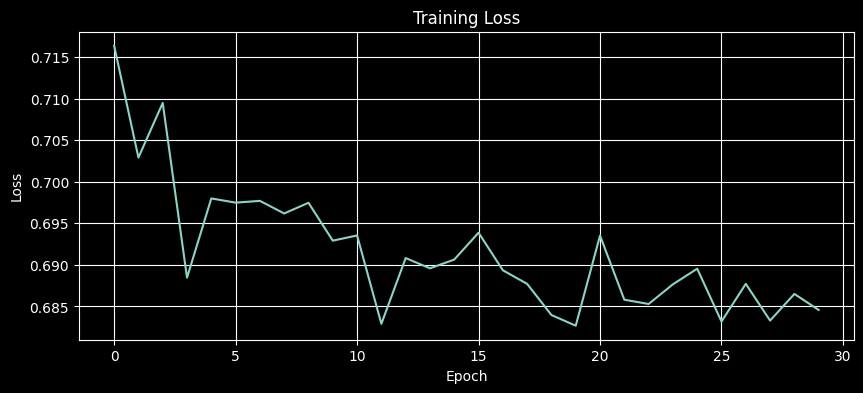

In [6]:
# here testing neural net
from src.models.neural_net import NeuralNetModel

# Simple network
nn_model = NeuralNetModel(
    hidden_dims=[32, 16],
    dropout=0.2,
    learning_rate=0.001,
    epochs=100,
    early_stopping_patience=10,
    verbose=True
)

nn_model.fit(X_train, y_train)

train_metrics = nn_model.evaluate(X_train, y_train)
test_metrics = nn_model.evaluate(X_test, y_test)

print(f"Train accuracy: {train_metrics['accuracy']:.4f}")
print(f"Test accuracy: {test_metrics['accuracy']:.4f}")
print(f"Overfit gap: {train_metrics['accuracy'] - test_metrics['accuracy']:.4f}")

# Visualize training
nn_model.plot_training_history()

In [7]:
from src.models.baseline import compare_models
from src.models.tree_models import RandomForestModel

models = [
    LogisticRegressionModel(C=1.0),
    RandomForestModel(n_estimators=100, max_depth=3, min_samples_leaf=100),
    NeuralNetModel(hidden_dims=[16], epochs=50),           # Tiny
    NeuralNetModel(hidden_dims=[32, 16], epochs=100),      # Small
    NeuralNetModel(hidden_dims=[64, 32, 16], epochs=100),  # Medium
]

results = compare_models(models, X_train, X_test, y_train, y_test)
print(results)

                     model  train_accuracy  test_accuracy  train_auc  \
0  LogisticRegressionModel        0.545321       0.482301   0.541657   
1        RandomForestModel        0.557111       0.530973   0.625512   
2           NeuralNetModel        0.556374       0.522124   0.565325   
3           NeuralNetModel        0.617539       0.513274   0.656392   
4           NeuralNetModel        0.605748       0.508850   0.644292   

   test_auc  overfit_gap  
0  0.435377     0.063020  
1  0.429245     0.026138  
2  0.452752     0.034250  
3  0.431211     0.104264  
4  0.467610     0.096898  


## Phase 3. Live APIs

In [1]:
import nest_asyncio
nest_asyncio.apply()

In [7]:
import nest_asyncio
nest_asyncio.apply()

from src.execution.ib_connection import IBConnection, get_stock_contract

conn = IBConnection(port=7497)
conn.connect()

print(f"Connected: {conn.is_connected()}")
print(f"Accounts: {conn.ib.managedAccounts()}")

conn.ib.reqMarketDataType(3)

# Fetch a quote
aapl = get_stock_contract('AAPL')
conn.ib.qualifyContracts(aapl)

ticker = conn.ib.reqMktData(aapl)

import time
time.sleep(2)

print(f"\nSymbol: {aapl.symbol}")
print(f"Last price: {ticker.last}")
print(f"Bid: {ticker.bid}")
print(f"Ask: {ticker.ask}")

conn.ib.cancelMktData(aapl)
conn.disconnect()

Connected: True
Accounts: ['DUP678137']

Symbol: AAPL
Last price: nan
Bid: nan
Ask: nan


In [6]:
conn = IBConnection(port=7497)
conn.connect()

aapl = get_stock_contract('AAPL')
conn.ib.qualifyContracts(aapl)

# Fetch historical data
bars = conn.ib.reqHistoricalData(
    aapl,
    endDateTime='',  # Empty = now
    durationStr='5 D',  # Last 5 days
    barSizeSetting='1 hour',
    whatToShow='TRADES',
    useRTH=True  # Regular trading hours only
)

for bar in bars[-5:]:  # Print last 5 bars
    print(f"{bar.date} | O:{bar.open} H:{bar.high} L:{bar.low} C:{bar.close} V:{bar.volume}")

conn.disconnect()

2026-02-06 09:30:00-05:00 | O:277.18 H:280.74 L:277.0 C:280.53 V:6718783.0
2026-02-06 10:00:00-05:00 | O:280.54 H:280.91 L:278.35 C:278.81 V:5595010.0
2026-02-06 11:00:00-05:00 | O:278.83 H:279.78 L:278.49 C:279.09 V:3840227.0
2026-02-06 12:00:00-05:00 | O:279.05 H:279.47 L:277.9 C:278.3 V:2462150.0
2026-02-06 13:00:00-05:00 | O:278.3 H:278.43 L:278.25 C:278.35 V:141216.0
